In [115]:
import ee 
import shapely as shp
import pandas as pd
import numpy as np
import geopandas as gpd
import ast
from shapely.geometry import Polygon, MultiPolygon, Point
import rasterio
import geopandas as gpd
import sys
%load_ext autoreload
%autoreload 2
sys.path.insert(1, '/Users/gr_1/Documents/simplem/')
import simplem_par as simplem
import matplotlib.pyplot as plt
import os
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 22})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [69]:
import inspect

In [70]:
os.path.abspath(inspect.getfile(simplem))

'/Users/gr_1/Documents/simplem/simplem_par.py'

In [309]:
import numpy as np
## Figures
folder = 'results/r_mn05_6/'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)
slps2 =np.load('{}/slps2.npy'.format(folder),allow_pickle=True)

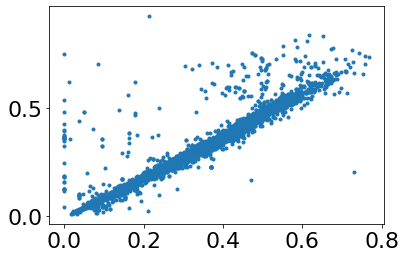

In [310]:
plt.plot(slps2[:3553],a['slp_ave']/1000,'.')

In [311]:
a = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/octo_327_data')

In [316]:
badn

[]

In [343]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [344]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()

badn = []
badd = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])

        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression()
        if len(x[np.logical_not(np.isnan(x))])>500:
                #print(len(x[np.logical_not(np.isnan(x))]))
#                 if 1:
#                     x = x[ y > -5 ]

#                     y = y[ y > -5 ]
                print(len(x))
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
            
                intercept = np.mean( y - x )
  
            ####
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * np.exp(intercept)#p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                #try:
                r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                #r2s[i] = sklearn.metrics.mean_gamma_deviance(y.reshape(-1,1),y2)
                #except:
                #print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = sklearn.metrics.mean_absolute_error(np.exp(y.reshape(-1,1)),np.exp(y2))
                print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = intercept
                drat[i][np.isinf(drat[i])] = 0
                dratave[i] = np.mean(drat[i][drat[i]>0])
               # if resid[i]>127.9:
                #    break
        else:
            print('lj1i2eoifwje')
a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])

<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198
3198


<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-344-1d8b638cf174>:18: RuntimeWarning: divide by z

(0.0, 0.5)

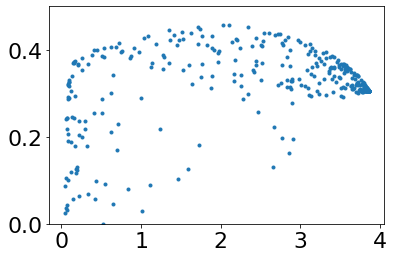

In [325]:
plt.plot(dratave,r2s,'.')
plt.ylim([0,.5])

Text(0, 0.5, 'r2')

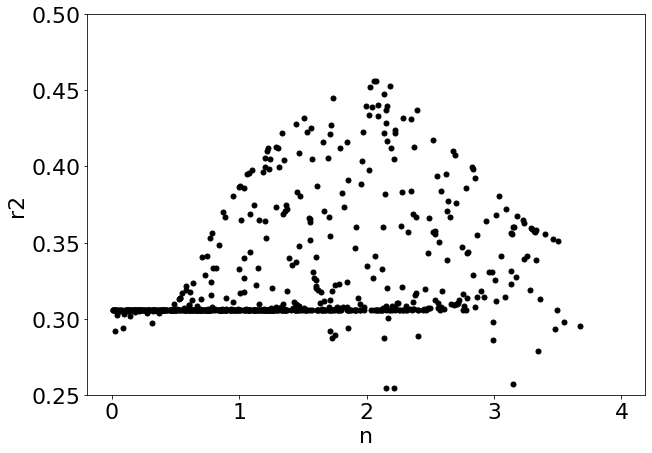

In [326]:

fig,ax = plt.subplots(figsize=(10,7))
plt.plot(ns,r2s,'.k',markersize=10)

#plt.xscale('log')
#plt.xlim([0, 1])
#
plt.ylim([.25, .5])
plt.xlabel('n')
plt.ylabel('r2')
#plt.xlim(([0, 4]))

5.800966333320803

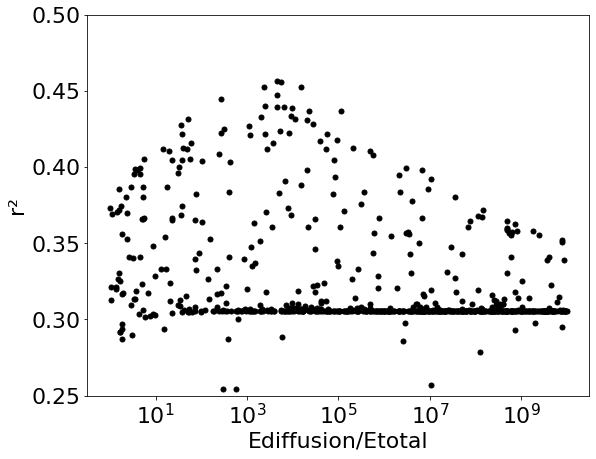

In [270]:
log = np.log10
fig,ax = plt.subplots(figsize=(9,7))
plt.plot(diffus/ks,r2s,'.k',markersize=10)
plt.xscale('log')
plt.xlabel('Ediffusion/Etotal')
#plt.xlim([1,10**8])
plt.ylabel('r'+ '2'.translate(superscript))
plt.ylim([.25,.5])
diffus[np.argmin(r2s)]/ks[np.argmin(r2s)]

In [126]:
(diffus/ks)[np.argmax(r2s)]

4492.651503316523

In [81]:
b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.98,1])
b2 = b1[~b1['top'].isna()]
sns.violinplot(data=b2,y='n')

b1 = pd.DataFrame()
b1['r' +'2'.translate(superscript)] = r2s
b1['log(D/k)'] = np.log10(diffus/ks) 
b1['n'] = ns
b1['Diffusion/total'] = dratave
b1['top'] = pd.qcut(b1['r²'],[.95,1])

NameError: name 'sns' is not defined

In [16]:
np.max(r2s)

0.4518992151205522

Text(0.5, 0, 'D/k ratio')

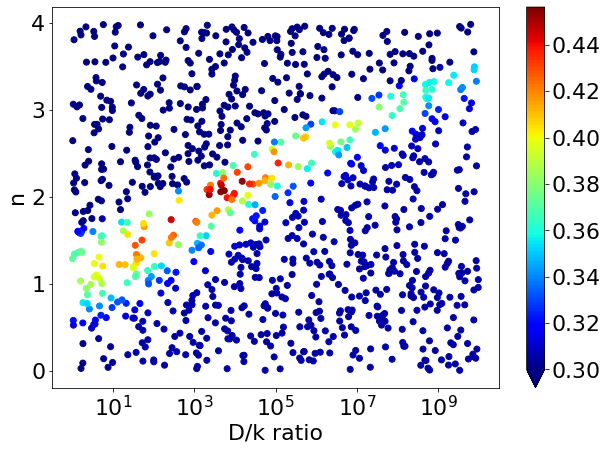

In [95]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')


In [97]:
ns[np.argmax(r2s)]

2.060090188998529

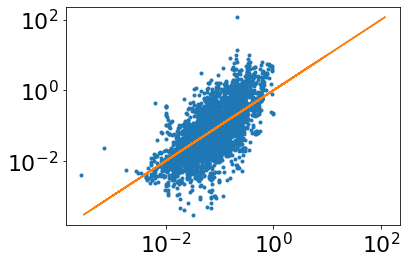

In [98]:
plt.plot(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')

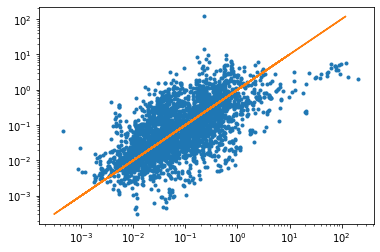

In [31]:
plt.plot(dfs[10][:len(a)]*np.exp(pcoef[10]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.xscale('log')
plt.yscale('log')

3.8859454666439635


2.0191858680673165

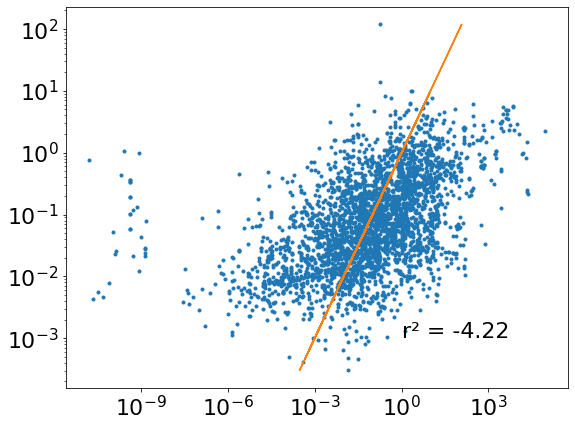

In [679]:
plt.subplots(figsize=(9,7))
n1 = 998# Xth worst estimate
plt.plot(dfs[np.argsort(r2s)[-n1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-n1]]),a['ebe_mmkyr']/1000,'.')
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000)
plt.text(1,.001, 'r' + '2'.translate(superscript) + ' = ' + str(r2s[np.argsort(r2s)[-n1]])[:5])
plt.xscale('log')
plt.yscale('log')
print(ns[np.argsort(r2s)[-n1]])
diffus[np.argsort(r2s)[-n1]]/ks[np.argsort(r2s)[-n1]]

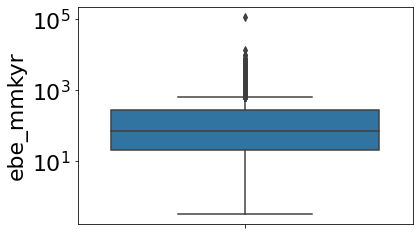

In [688]:
sns.boxplot(data=a,y ='ebe_mmkyr')
a['log(ebe_mmkyr)'] = np.log10(a['ebe_mmkyr'])
plt.yscale('log')

In [228]:
diffus[np.argmax(r2s)]/ks[np.argmax(r2s)]

1804.5545601198119

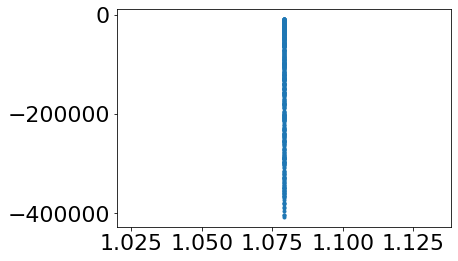

In [497]:
plt.plot(np.log10(careas),resid,'.')
#plt.ylim([.2, .5])

(array([41., 31., 33., 26., 20., 35., 21., 15., 24., 22.]),
 array([0.01062576, 1.00164145, 1.99265713, 2.98367281, 3.97468849,
        4.96570417, 5.95671985, 6.94773553, 7.93875122, 8.9297669 ,
        9.92078258]),
 <BarContainer object of 10 artists>)

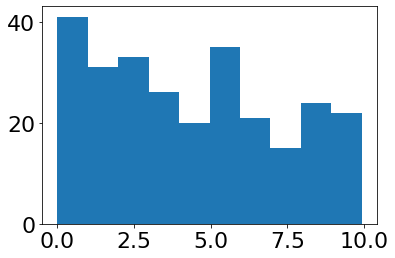

In [226]:
l = np.log10(diffus/ks)
plt.hist(l[r2s>.3])
#plt.plot(np.log10(diffus/ks),r2s,'.')
#plt.ylim([.2, .5])

NameError: name 'areas' is not defined

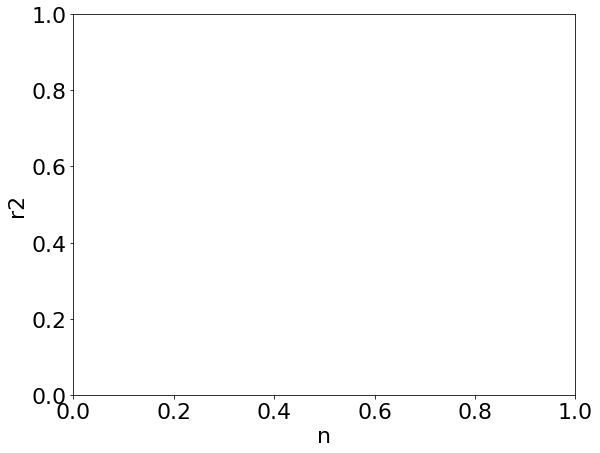

In [496]:
plt.rcParams.update({'font.size': 22})
fig, ax = plt.subplots(figsize = (9,7))
plt.xlabel('n')
plt.ylabel('r2')
plt.scatter(ns,r2s,10,c=a[areas])
plt.ylim([0,.5])
#plt.xscale('log')
#plt.yscale('log')


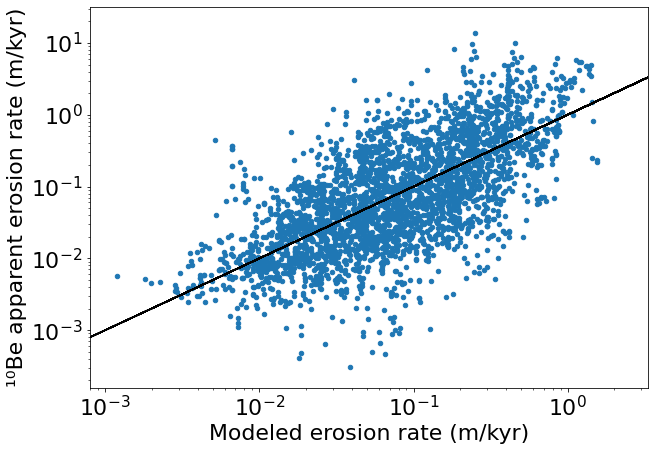

In [113]:
fig, ax = plt.subplots(figsize = (10,7))
io =np.argmax(r2s)
plt.scatter(dfs[io][:len(a)]*np.exp(pcoef[io]),a['ebe_mmkyr']/1000,s=20)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.1,10**.52])
plt.ylim([10**-3.8,10**1.5])
plt.xlabel('Modeled erosion rate (m/kyr)')
plt.ylabel('{}Be apparent erosion rate (m/kyr)'.format('10'.translate(superscript)))
plt.xscale('log')
plt.yscale('log')
#plt.colorbar()

In [53]:
np.max(a.centroid.y)

<ipython-input-53-9bf30d9964c4>:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  np.max(a.centroid.y)


51.5038464267361

Text(0, 0.5, 'Slope Octopus')

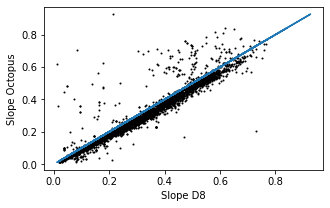

In [44]:
fig, ax = plt.subplots(figsize = (5,3))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553][slps2[:3553]>0],a['slp_ave'][slps2[:3553]>0]/1000,c='k', s=1)
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
plt.xlabel('Slope D8')
plt.ylabel('Slope Octopus')

#plt.xscale('log')
#plt.yscale('log')


In [56]:
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)>.2)[0]) 

50

In [138]:
#slps1 = gpd.read_file('basins_aspect_means_0 (2).csv')
#slps1 = pd.to_numeric(slps1['slp_ave'],errors='coerce')

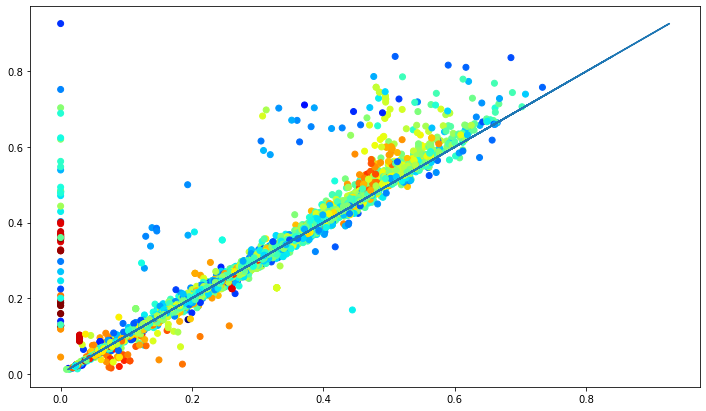

In [218]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['slp_ave']/1000,c=np.log10(a['area']),cmap='jet')
plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
#plt.yscale('log')


In [225]:
np.argmax((slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000))

2145

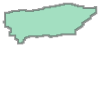

In [238]:
a.geometry[2145]

212

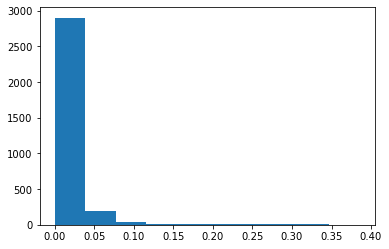

In [169]:
plt.hist((np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000)))
len(np.where(np.abs(slps2[:3553][slps2[:3553]>0] - a['slp_ave'][slps2[:3553]>0]/1000) > .05)[0])

<ipython-input-177-7581de6ca083>:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')


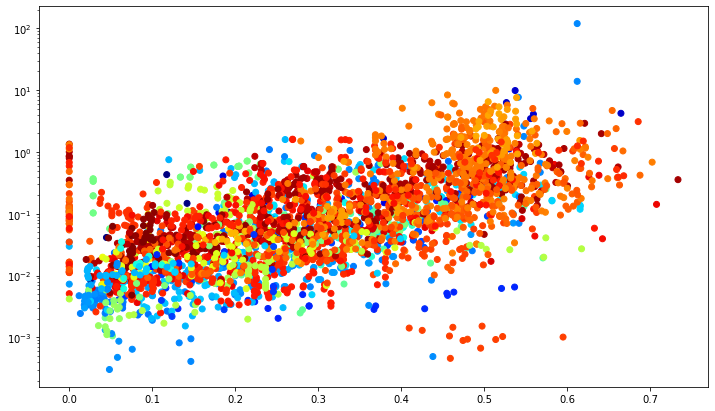

In [177]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')
plt.yscale('log')

<ipython-input-193-a1e92631e24c>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], '.')


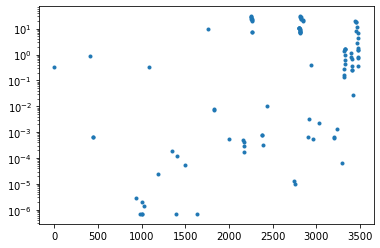

In [193]:
plt.yscale('log')

<ipython-input-195-77bdca639977>:1: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[a['area']>0], '.')
<ipython-input-195-77bdca639977>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')


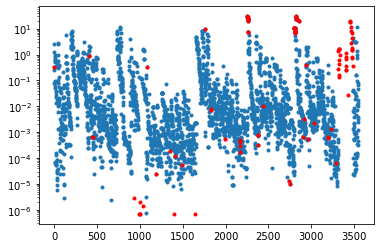

In [195]:
plt.plot(a.area[a['area']>0], '.')
plt.plot(a.area[slps2[:3553] == 0][a.area>0], 'r.')

plt.yscale('log')

In [189]:
np.mean(a['area'][a['area']>0])

3705.5099137177367

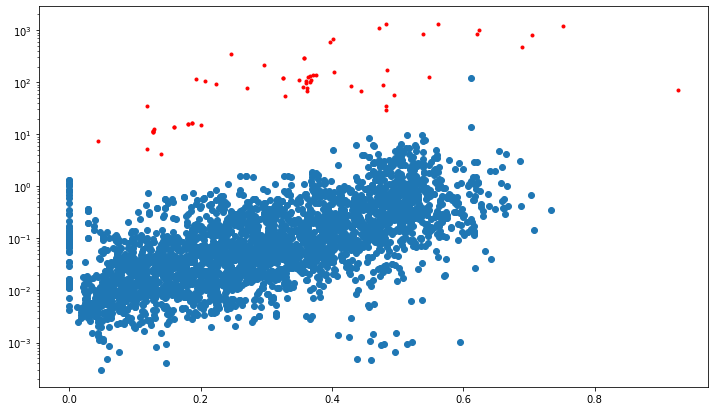

In [183]:
fig, ax = plt.subplots(figsize = (12,7))
slpsall = np.load('slpsall.npy')
plt.scatter(slps2[:3553], a['ebe_mmkyr']/1000)#,c=(a.centroid.y))
#plt.scatter(a['slp_ave']/1000, a['ebe_mmkyr']/1000,c=(a.centroid.y),vmin=-50,vmax=50,cmap='jet')

#plt.plot(a['slp_ave']/1000,a['slp_ave']/1000)
#plt.xscale('log')
plt.yscale('log')
plt.plot(a['slp_ave'][slps2[:3553]==0]/1000, a['ebe_mmkyr'][slps2[:3553]==0], 'r.')

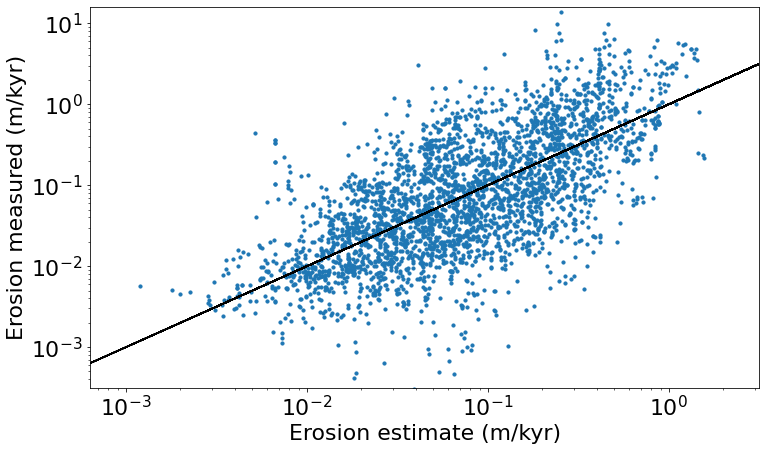

In [107]:
fig, ax = plt.subplots(figsize = (12,7))
r2s = -resid
plt.scatter(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]),a['ebe_mmkyr']/1000,s=10)
plt.plot(a['ebe_mmkyr']/1000,a['ebe_mmkyr']/1000,'k')
plt.xlim([10**-3.2,10**.5])
plt.ylim([10**-3.5,10**1.2])
plt.xlabel('Erosion estimate (m/kyr)')
plt.ylabel('Erosion measured (m/kyr)')
plt.xscale('log')
plt.yscale('log')
#c = plt.colorbar()
#c.set_label('log(Drainage area (km)' + '2'.translate(superscript) + ')')

In [92]:
from scipy.stats import bartlett

(0.0, 5.0)

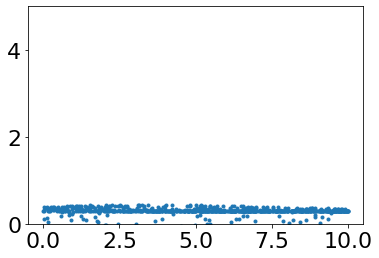

In [241]:
plt.plot(np.log10(diffus/ks),r2s,'.')
plt.ylim([0,5])

<ipython-input-106-a2047c141dde>:4: RuntimeWarning: divide by zero encountered in log10
  a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1389: RuntimeWarning: All-NaN slice encountered
  result = np.apply_along_axis(_nanquantile_1d, axis, a, q,
<ipython-input-106-a2047c141dde>:11: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  plt.xlim([0, 10**6])


(0.013385378085027523, 1000000)

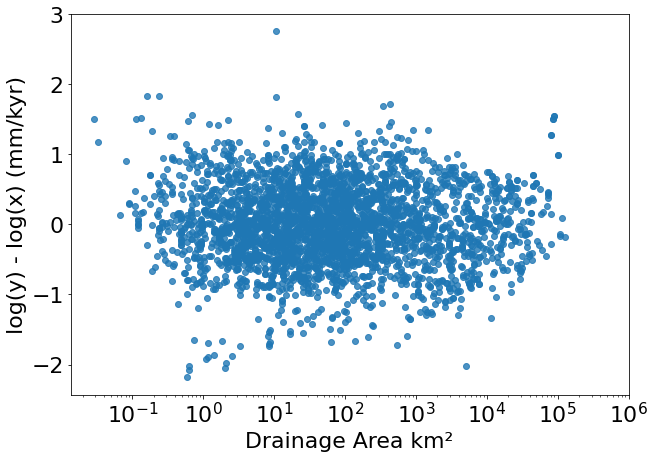

In [106]:
import seaborn as sns
plt.subplots(figsize = (10,7))
a['resid'] = 1
a['resid'] = -np.log10(dfs[np.argsort(r2s)[-1]][:len(a)]*np.exp(pcoef[np.argsort(r2s)[-1]]))+np.log10(a['ebe_mmkyr']/1000)
loc = a.index[np.isinf(a['resid'])]
#a['bio12'][loc] = 0
sns.regplot(data=a,x='area',y='resid',fit_reg=True,scatter=True)
plt.xscale('log')
plt.xlabel('Drainage Area ' + 'km' +'2'.translate(superscript))
plt.ylabel('log(y) - log(x) (mm/kyr)')
plt.xlim([0, 10**6])


In [149]:
a2 = a.loc[~a['resid'].isna()]
a2 = a2.loc[~a2['area'].isna()]
a2 = a2.loc[~(a2['resid']>1e20)]
a2 = a2.loc[~(a2['area']>1e20)]
a2 = a2.loc[~(a2['resid']<-1e20)]
a2 = a2.loc[~(a2['area']<-1e20)]

In [151]:
p1 = a2['resid'][a2['area']>10**3].to_numpy()
p2 = a2['resid'][a2['area']<=10**3].to_numpy()

bartlett(p1,p2)

BartlettResult(statistic=4.28507663992576, pvalue=0.038448349142781967)

In [1481]:
fig,ax = plt.subplots(figsize=(10,7))
ax = plt.scatter(diffus/ks,ns,c=r2s,cmap='jet',vmin=.3)
plt.xscale('log')
plt.colorbar(ax,extend='min')
plt.ylabel('n')
plt.xlabel('D/k ratio')

array([   0,   37,  113,  114,  408,  447,  449,  467, 1071, 1072, 1089,
       1184, 1349, 1391, 1407, 1474, 1494, 1671, 1765, 1832, 1833, 1999,
       2166, 2169, 2172, 2174, 2255, 2256, 2257, 2258, 2259, 2260, 2261,
       2262, 2263, 2381, 2382, 2385, 2433, 2746, 2751, 2803, 2804, 2805,
       2806, 2807, 2808, 2809, 2810, 2811, 2812, 2813, 2814, 2818, 2819,
       2820, 2821, 2822, 2851, 2852, 2905, 2912, 2939, 2967, 3028, 3199,
       3200, 3236, 3291])

In [ ]:
plt.scatter(np.log10(a['area']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.subplots(figsize=(5,5))
plt.scatter(np.log10(a['slp_ave']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)
plt.figure()
plt.scatter(np.log10(a['ebe_mmkyr']),np.log10(dfs[np.argmax(r2s)][:len(a)]*np.exp(pcoef[np.argmax(r2s)]))-np.log10(a['ebe_mmkyr']/1000),s=30)


In [7]:
import numpy as np
## Figures
folder = 'results/var_concavity_1//'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/eros.npy'.format(folder),allow_pickle=True)

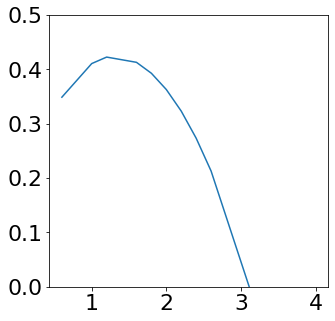

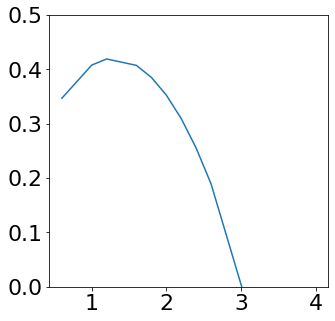

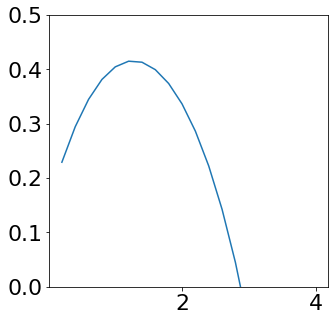

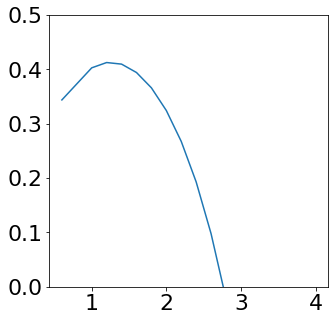

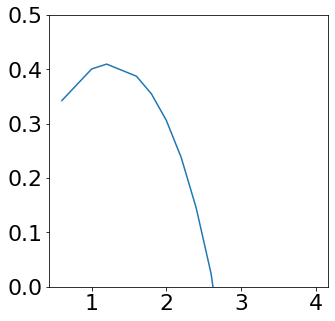

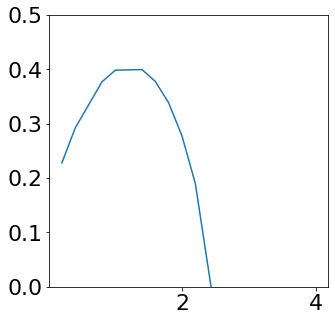

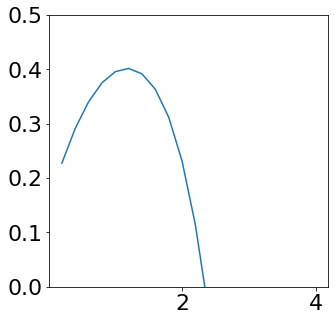

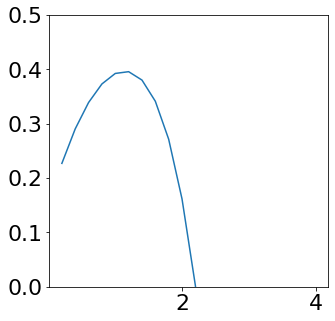

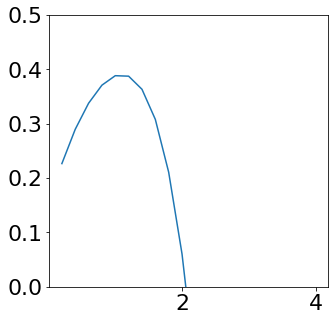

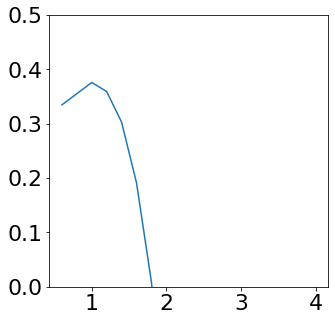

In [508]:
ss = np.unique(np.round(ms/ns,2))
o = np.zeros(len(ss))
for c,s in enumerate(ss):
    fig,ax = plt.subplots(figsize=(5,5))
    I = np.where(ms/ns==s)[0]
    plt.plot(ns[I],r2s[I])
    plt.ylim([0, .5])
    o[c] = np.max(r2s[I])
    c+=1


## Compare w/ bio data

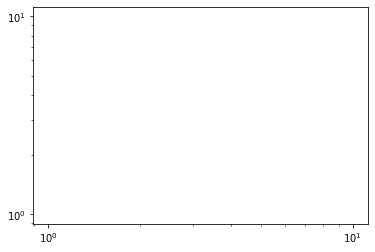

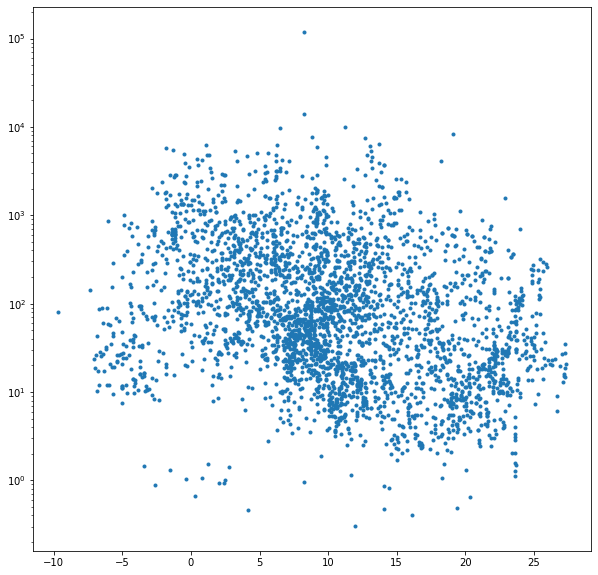

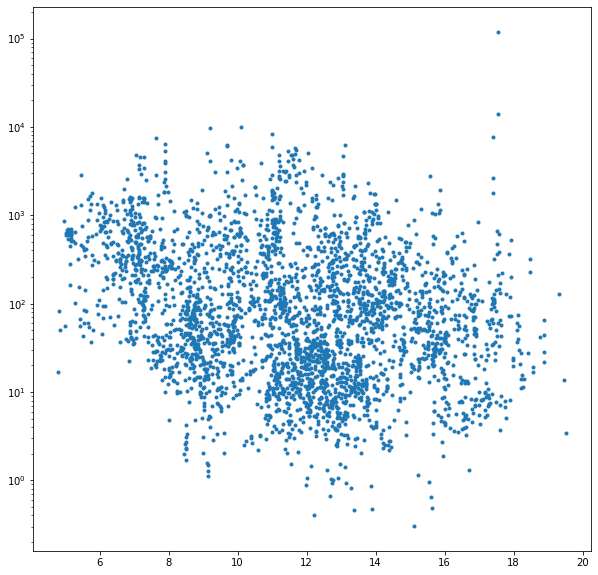

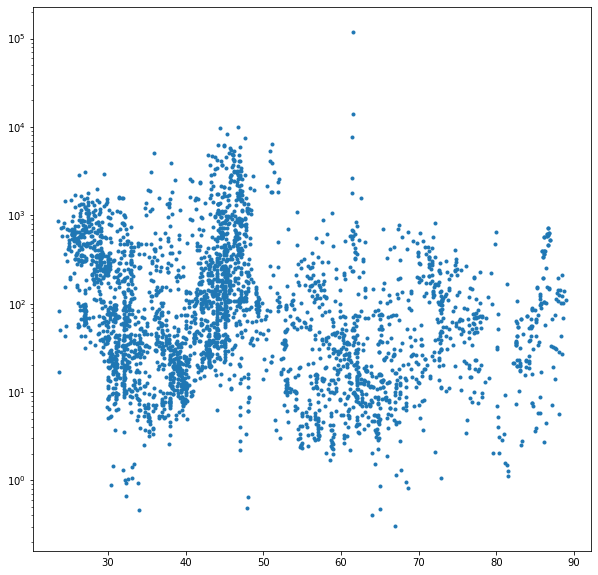

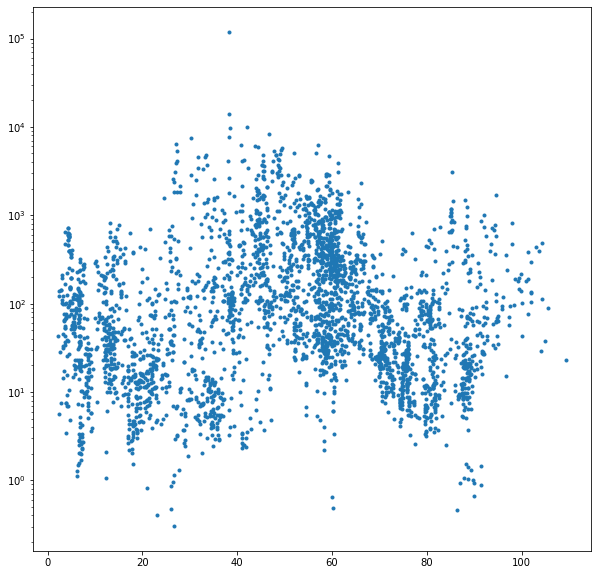

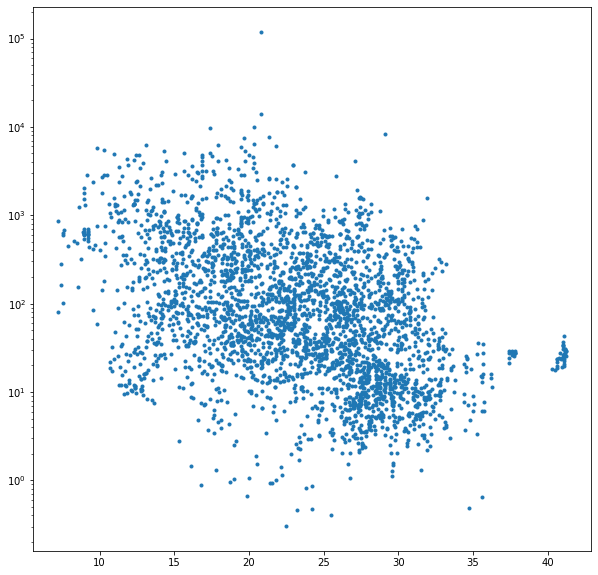

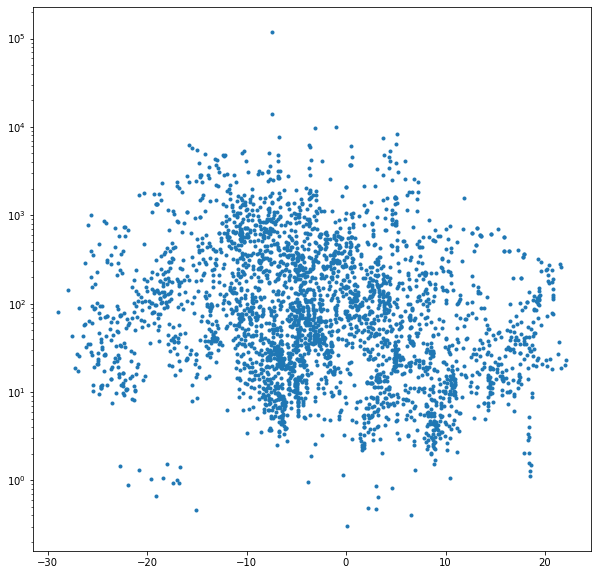

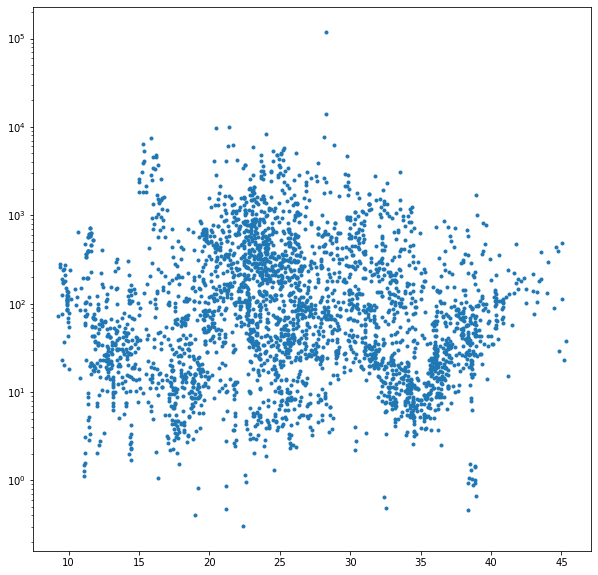

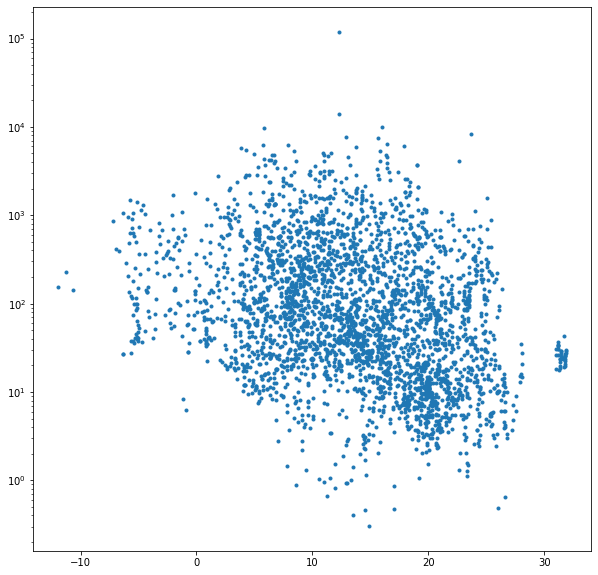

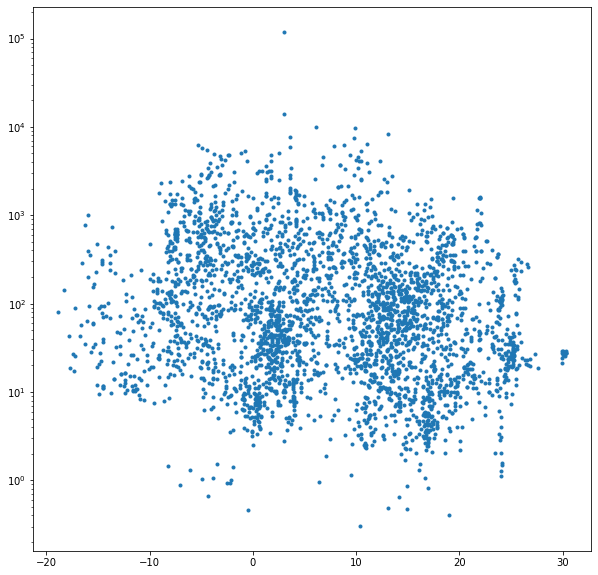

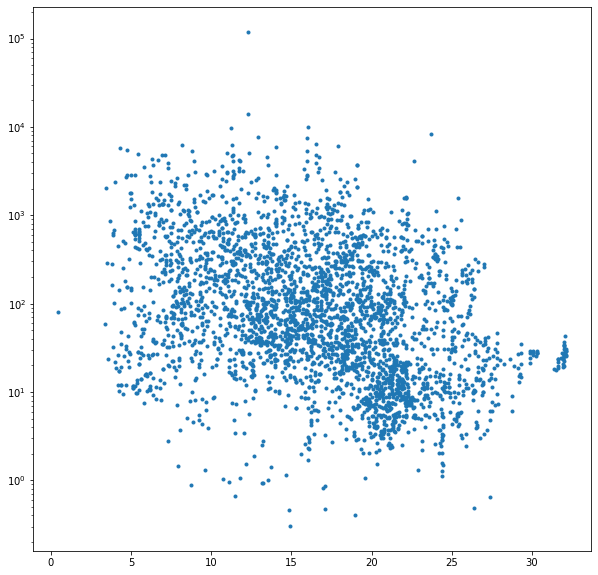

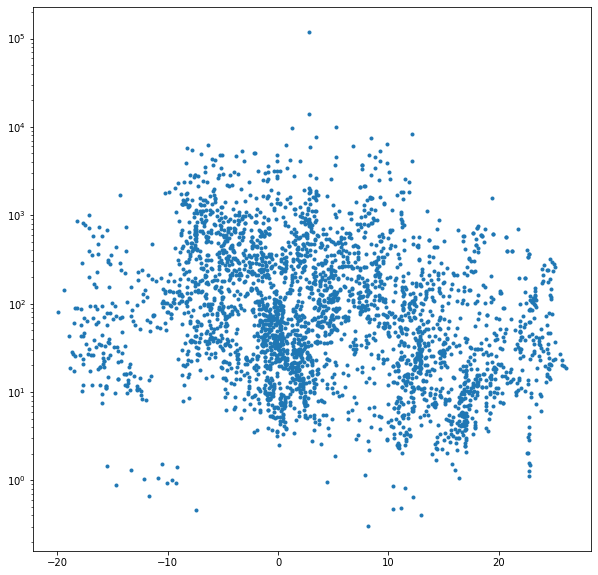

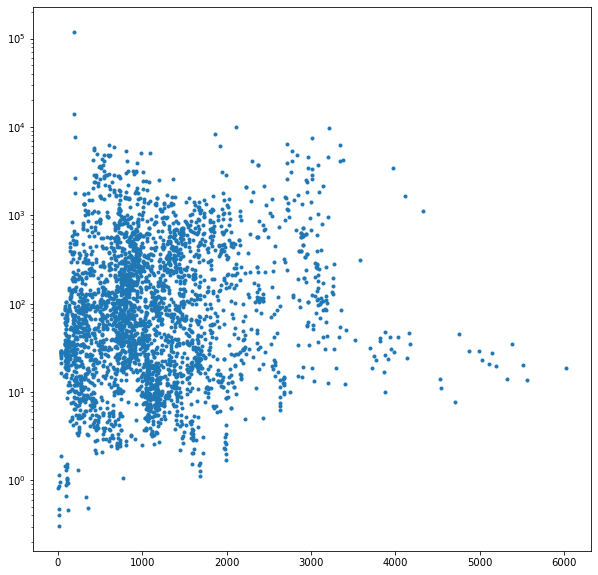

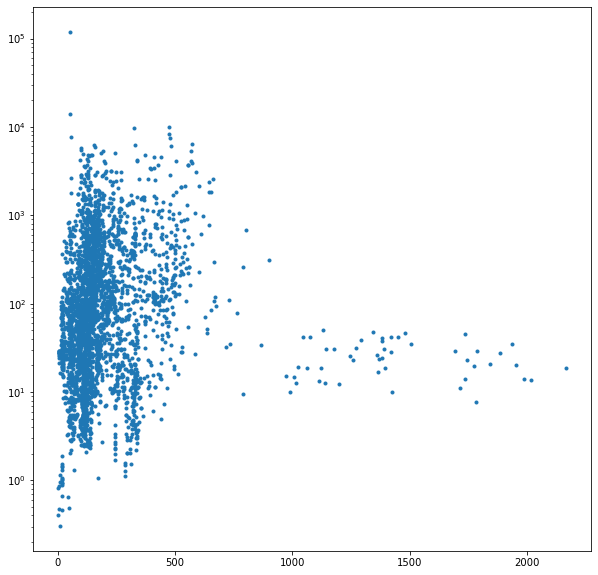

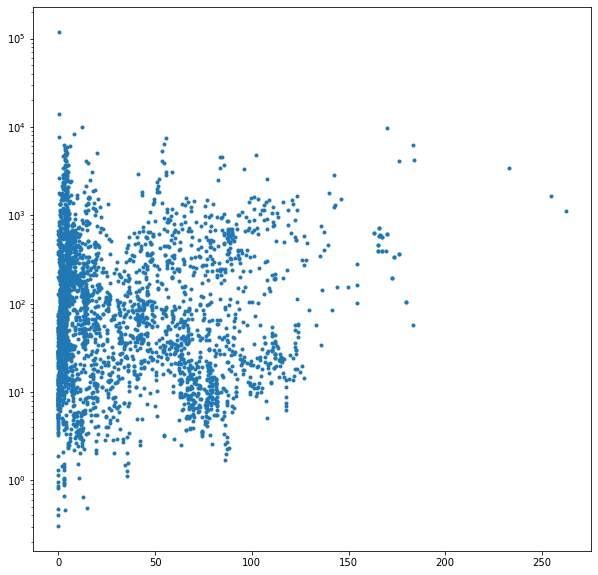

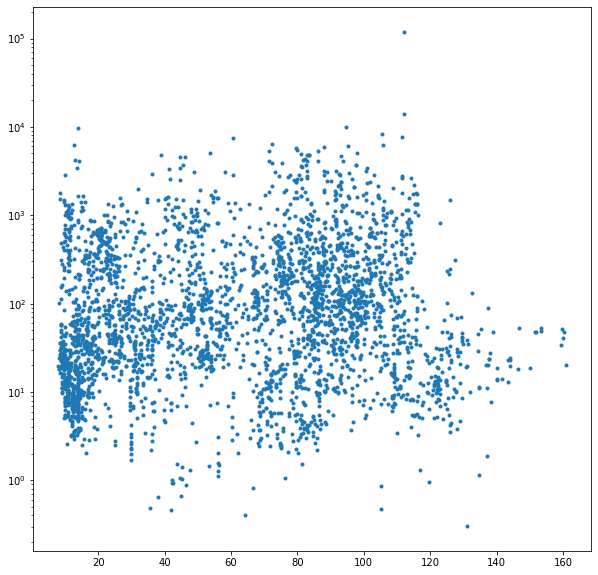

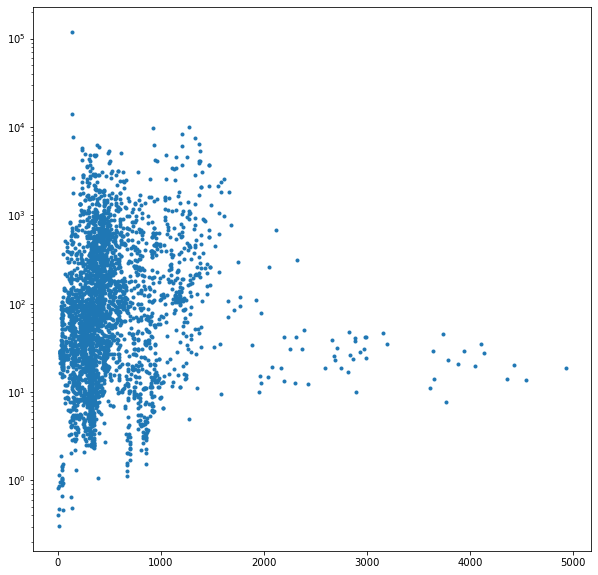

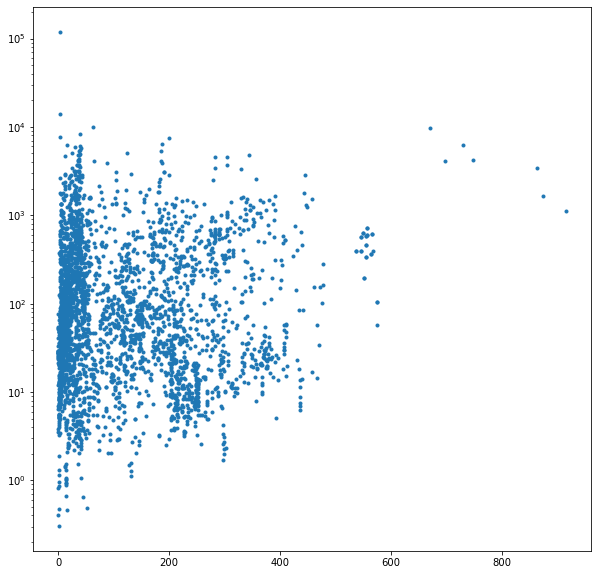

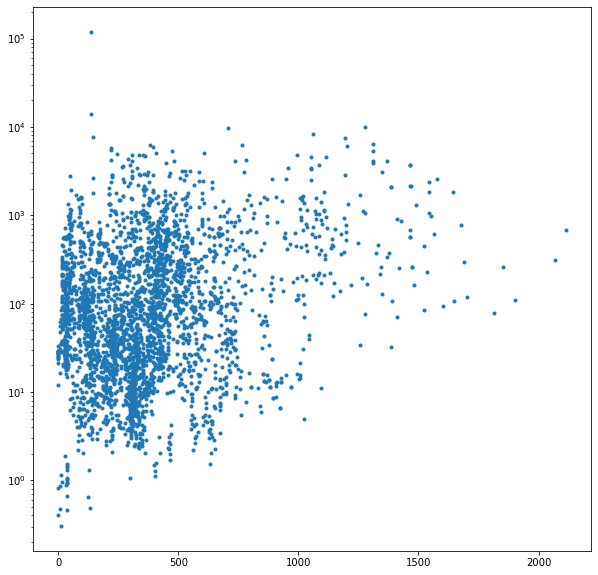

In [257]:
import seaborn as sns
scales = [0,10,10,1,100,10,10,10,10,10,10,10,1,1,1,1,1,1,1,1,1]
a['realid'] = a.index

for i in range(1,19):
    n = pd.read_csv('/Users/gr_1/Google Drive/data_earth_engine/basins_bio_{}.csv'.format(str(i)))
    if i == 1:
        ns1 = n
    #ns['bio'+str(i)] = n['mean']
    # a['ebe_mmkyr'] = np.round(a['slp_ave'],4)
   # n['ebe_mmkyr'] = np.round(n['ebe_mmkyr'],4)
    #n['slp'] = a['slp_ave']
    plt.xscale('log')
    plt.yscale('log')
    n.index = n['realid']
    a['bio' + str(i)] = 0
    #a['bio' + str(i)] = n['mean']/scales[i]
    a['bio' + str(i)] = n['mean']/scales[i]
    #sns.scatterplot(data=a,x='bio' + str(i),y='ksn')
    n.index = range(len(n))
    #a2['bio_old'+str(i)] = n['mean']
for i in range(1,19):
    fig,ax = plt.subplots(figsize=(10,10))

    plt.plot(a['bio' + str(i)],a['ebe_mmkyr'],'.')
    #plt.xscale('log')
    plt.yscale('log')

   # plt.ylim([1, 100])



In [268]:
import jenkspy
#a['meantempclass'] = pd.qcut(a['bio12'],4)
#a['meantempclass'] = pd.cut(a['bio12'],[0,1000,2000,4000,np.Inf])
#a['meantempclass'] = pd.cut(a['bio15'],[0,50,100,150,np.Inf])
breaks = jenkspy.jenks_breaks(a['bio12'], nb_class=5)
if 0:
    r1 =  np.power(10.0,np.float64(list(np.arange(-2,6,1.75)))).tolist()
    #r1.insert(0,10**-2)
    #r1.insert(len(r1)+1,10**6)
    a['area'][np.isnan(a['area'])] = 0
    a['elev_ave'][a['elev_ave'] == 0] = np.nan
    a['meantempclass'] = pd.cut(a['elev_ave'],5)
    a['meantempclass']

a['meantempclass'] = pd.qcut(a['bio12'],5)
#a['meantempclass'] = list(zip(pd.qcut(a['bio12'],3), pd.qcut(a['bio1'],3)))
#a['meantempclass'] = pd.qcut(a['bio1'] - a['bio14'], 10)


<ipython-input-269-f4c54442928e>:10: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a2.geometry = a.geometry.centroid


<AxesSubplot:>

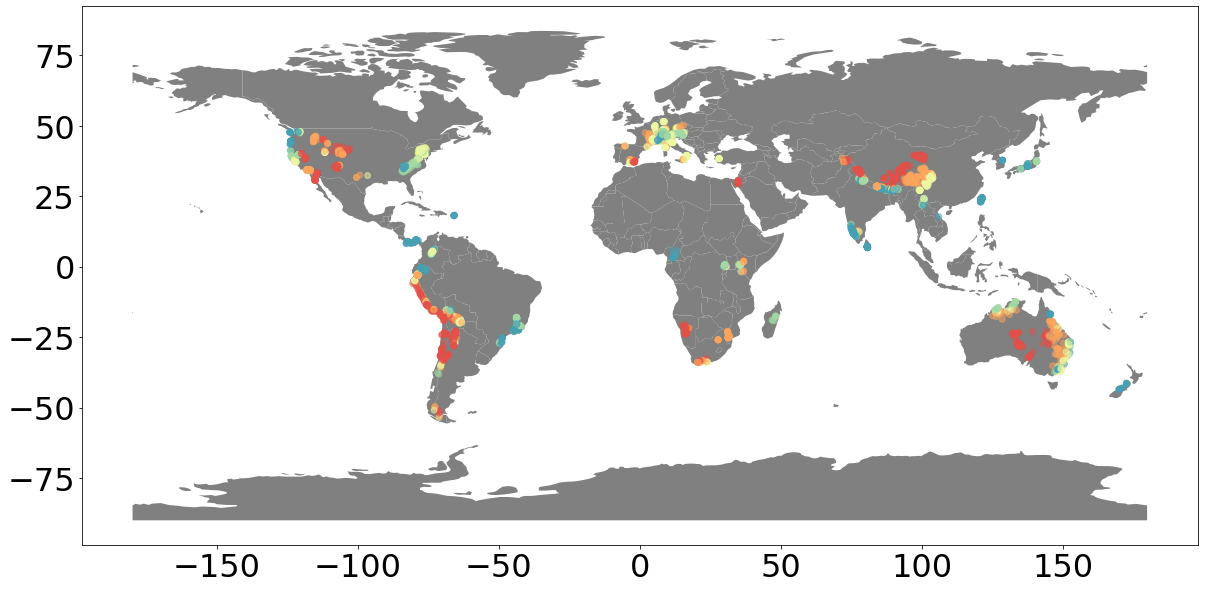

In [269]:
from matplotlib.colors import ListedColormap
plt.rcParams.update({'font.size': 32})
fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = a['meantempclass']


a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("Spectral").as_hex()[:7]),alpha=.5)
#plt.imshow(f)

In [260]:
## tectonic regimes
t = gpd.read_file('/Users/gr_1/Documents/cosmo_predict/tectonic_region/')
a['meantempclass'] = -1
mt1 = np.zeros(len(a))
for i in range(len(a)):
    try:
        mt1[i] = t.index[t.contains(a.geometry[i].centroid)][0]
    except:
        continue
a['meantempclass'] = np.int32(mt1)

In [261]:
t.index = np.arange(len(t))
a.index = np.arange(len(a))
regions = t['region'][a['meantempclass']]
regions.index = np.arange(len(regions))
a['region'] = regions

In [262]:
## Unique cross-validation type thing
c=0
a['id'] = range(len(a))
groups = np.zeros((1000,1000))
for i,b in a.groupby('meantempclass'):
    for j in range(len(b)):
        groups[c,j] = np.int32(b.iloc[j]['id'])
    c+=1



In [263]:
m,n = np.shape(groups)
a['meantempclass'] =0
for i in range(0,m):
    for j in range(0,n):
        if groups[i,j] > 0:
            a['meantempclass'][groups[i,j]] = j
        

<ipython-input-263-76b0c1aaaa60>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][groups[i,j]] = j
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [264]:
a2 = a[np.logical_or.reduce( [a['meantempclass'] == 96])]

In [265]:
len(a2[a2['region'] == 'Andes']) / len(a2)

0.0

In [266]:
m,n = np.shape(groups)
lens = np.zeros(len(eros1[1]))
for j in range(n):
    for i in range(m):
        lens[j] = len(np.where(groups[:,j]>0)[0])

In [ ]:
import seaborn as sns
plt.subplots(figsize=(10,7))
sns.histplot(data=a,x='bio10',log_scale=False,hue='meantempclass')

In [217]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 35#3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs

In [218]:
from sklearn import linear_model as lm
import sklearn
n = 0
r2s = [None] * len(a['meantempclass'].unique())
mntemp = np.zeros(len(r2s))
abox = pd.DataFrame()
abox['index'] = np.arange(len(eros1[1])*len(a['meantempclass'].unique()))
abox['r2s'] = 0
abox['drat'] = 0
abox['n'] = 0
abox['m/n'] = 0
abox['class'] = 0
abox['drat'] = 0
abox['dratave'] = 0
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")

mt = a['meantempclass'].unique()
c=0
for li in range(len(a['meantempclass'].unique())):
    ids = a.index[a['meantempclass'] == a['meantempclass'].unique()[li]]
    
    r2s[li] = np.zeros(len(eros1[1]))
    resid = np.zeros(len(eros1[1]))
    pcoef = np.zeros(len(eros1[1]))
    ks2 = ns.copy()#ks.copy()
    diffus2 = diffus.copy()
    mntemp[li] = np.mean(a['bio1'][ids])

    for i in range(len(eros1[1])):#range(len(ms)):
            if dfs[i][ids] is None:
                continue
            
            y = np.log(np.float64(a['ebe_mmkyr'][ids])/1000)
            x = np.log(dfs[i][ids])
            print(len(x[x>0]))
            #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
            #x=x[I_min]
            #y=y[I_min]

            xi = x.copy()
            I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
            x=np.delete(x,I)
            y=np.delete(y,I)
            I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
            x = np.delete(x,I2)
            y = np.delete(y,I2)
            
            
            l1  = lm.LinearRegression(fit_intercept=False)
            l = lm.LinearRegression(fit_intercept=False)
            if len(x[np.logical_not(np.isnan(x))])>50:
                
                    #print(a.loc[ids[0],'meantempclass'])
                    p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                    p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))
                    
                    intercept =np.mean(y-x)
                    y2 = x+intercept
                  #  ####
                   # if 1:
                       # x = x[ y2 > -4 ]

                       # y = y[ y2 > -4 ]
                       # y2 = y2[y2>-4]
                    ####
                   # y2 = p.predict(x.reshape(-1,1))
                    y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                    r2s[li][i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)
                    diffus2[i] *= p1.coef_
                    #ks2[i] *= p1.coef_
                    resid[i] = np.mean(np.abs(np.exp(y.ravel())-y3.ravel()))
                    print(len(y[np.logical_not(np.isnan(x))]))
                    pcoef[i] = p1.coef_
                    
                    abox.loc[c,'r2s'] = r2s[li][i]
                    abox.loc[c,'meantempclass'] = li#
                    abox.loc[c,'class'] = mt[li]
                    abox.loc[c,'n'] = ns[i]
                    abox.loc[c,'D/k'] = diffus[i] / ks[i]
                    abox.loc[c,'Diffusion/total'] = dratave[i] 
                    abox.loc[c,'m/n'] = ms[i] / ns[i]

                    c=c+1
    #abox.loc[ids,''] = r2s[li]

                   # if resid[i]>127.9:
                    #    break
#a['maxr2s'] = dfs[np.argmax('elev_mn')] * pcoef[np.argmax(maxr2s)]


KeyError: 'meantempclass'

In [ ]:
# ## temp
# abox.index = range(len(abox))
# fig,ax = plt.subplots(figsize=(25,10))
# #abox['class'] = abox['meantempclass']
# classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
#  'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
# r = abox['class']
# if 0:
#     abox['classnm'] = ''
#     abox['classnm'][r == 146] = classes[0]
#     abox['classnm'][r == 167] = classes[1]
#     abox['classnm'][r == 252] = classes[2]
#     abox['classnm'][r == 255] = classes[3]
#     abox['classnm'][r == 96] = classes[4]
#     abox['classnm'][r == 253] = classes[5]
#     abox['classnm'][r == 176] = classes[6]
#     abox['classnm'][r == 187] = classes[7]
# #a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
# #abox['classnm'] = r
# abox = abox[~(abox['classnm'] == '')]
# property1 = 'Rock Type'
# g2 = pd.DataFrame()
# for i,g in abox.groupby('class'):
#     g['rbin'] = pd.qcut(g['r2s'],[.95,1])
#     g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])

#     g2 = g2.append(g)

# g3 = g2[~g2['rbin2'].isna()]
# g3[property1] = g3['classnm']
# g3['r'+'2'.translate(superscript)] = g3['r2s']
# g3['r²'] = np.round(g3['r²'],2)
# print(g3['Diffusion/total'])
# g3['log(D/k)'] = np.log10(g3['D/k'])
# ax2 =sns.violinplot(data=g3,x=property1,y='r²',c='Spectral')

# cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

# g3 = g2[~g2['rbin'].isna()]
# g3['log(D/k)'] = np.log10(g3['D/k'])

# g3[property1] = g3['classnm']
# g3['r'+'2'.translate(superscript)] = g3['r2s']
# g3['r²'] = np.round(g3['r²'],2)
# sns.violinplot(data=g3,x=property1, y='r²',c='Spectral')
# #plt.yscale('log')
# g

# #plt.ylim([0,1.2])
# #plt.plot([.1,.1],[.2,.2])

In [592]:
g3

,index,r2s,drat,n,class,dratave,meantempclass,D/k,Diffusion/total,classnm,rbin,rbin2,log(D/k),Precip Range (mm/yr)
32,32,0.240775,0,2.342371,"(4.197, 442.92]",0,0.0,1.881185e+05,0.909893,"(4.197, 442.92]","(0.231, 0.256]",NaN,5.274431,"(4.197, 442.92]"
51,51,0.247368,0,3.061346,"(4.197, 442.92]",0,0.0,3.523770e+07,0.888136,"(4.197, 442.92]","(0.231, 0.256]",NaN,7.547008,"(4.197, 442.92]"
61,61,0.246887,0,3.344091,"(4.197, 442.92]",0,0.0,3.462913e+09,0.968213,"(4.197, 442.92]","(0.231, 0.256]",NaN,9.539442,"(4.197, 442.92]"
99,99,0.237960,0,3.358424,"(4.197, 442.92]",0,0.0,6.546044e+08,0.913259,"(4.197, 442.92]","(0.231, 0.256]",NaN,8.815979,"(4.197, 442.92]"
140,140,0.256489,0,2.568892,"(4.197, 442.92]",0,0.0,4.146288e+05,0.837166,"(4.197, 442.92]","(0.231, 0.256]","(0.25648400000000005, 0.256489]",5.617660,"(4.197, 442.92]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4910,4910,0.329117,0,3.530801,"(1562.105, 6019.153]",0,4.0,3.299366e+08,0.776751,"(1562.105, 6019.153]","(0.321, 0.376]",NaN,8.518430,"(1562.105, 6019.153]"
4965,4965,0.363778,0,2.087341,"(1562.105, 6019.153]",0,4.0,1.431882e+03,0.490353,"(1562.105, 6019.153]","(0.321, 0.376]",NaN,3.155907,"(1562.105, 6019.153]"
4968,4968,0.354084,0,3.113190,"(1562.105, 6019.153]",0,4.0,7.737474e+06,0.720687,"(1562.105, 6019.153]","(0.321, 0.376]",NaN,6.888599,"(1562.105, 6019.153]"
4974,4974,0.367649,0,2.317867,"(1562.105, 6019.153]",0,4.0,1.100677e+04,0.586042,"(1562.105, 6019.153]","(0.321, 0.376]",NaN,4.041660,"(1562.105, 6019.153]"


403     2.958365
1225    2.595416
2071    2.995861
3664    2.999978
4784    3.808751
Name: n, dtype: float64


<ipython-input-279-be4818079bc4>:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3[property1] = g3['classnm']
<ipython-input-279-be4818079bc4>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  g3['r'+'2'.translate(superscript)] = g3['r2s']
<ipython-input-279-be4818079bc4>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

<AxesSubplot:xlabel='Precip range (mm/yr)', ylabel='m/n'>

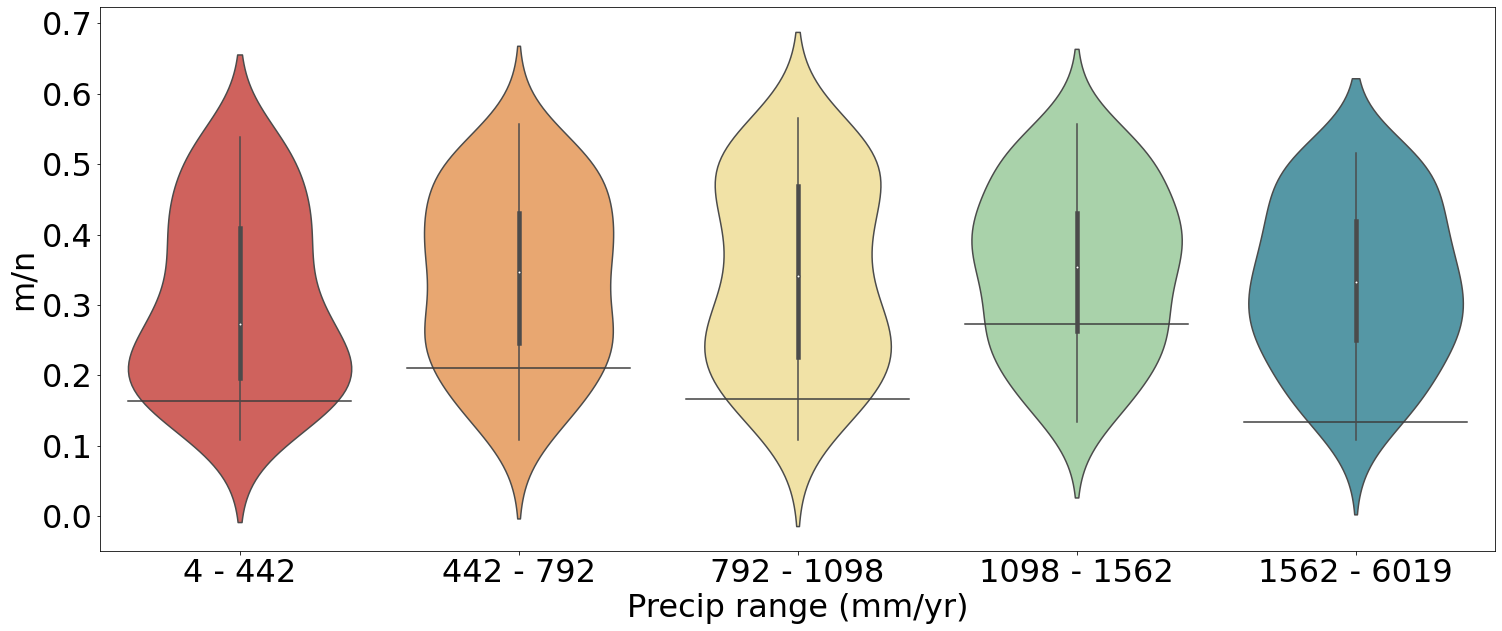

In [279]:
## temp
abox.index = range(len(abox))
fig,ax = plt.subplots(figsize=(25,10))
plt.rcParams.update({'font.size': 32})

classes = ['Mixed Sedimentary','Metamorphic / plutonic','Plutonic','Volcanic',
 'Mixed sed/volcanic','Unclassified','Ice cap','Melang/schist or tectonite belt']
r = abox['class']
if 0:
    abox['classnm'] = np.nan
    abox['classnm'][r == 146] = classes[0]
    abox['classnm'][r == 167] = classes[1]
    abox['classnm'][r == 252] = classes[2]
    abox['classnm'][r == 255] = classes[3]
    abox['classnm'][r == 96] = classes[4]
    abox['classnm'][r == 253] = classes[5]
    abox['classnm'][r == 176] = classes[6]
    abox['classnm'][r == 187] = classes[7]
#a['maxr2'] = dfs[np.argmax(r2s)][:len(a)] * np.exp(pcoef[np.argmax(r2s)])
abox['classnm'] = r
property1 = 'Precip Range (mm/yr)'
g2 = pd.DataFrame()
for i,g in abox.groupby('class'):
    g['rbin'] = pd.qcut(g['r2s'],[.95,1])
    g['rbin2'] = pd.qcut(g['r2s'],[.99999,1])

    g2 = g2.append(g)

g3 = g2[~g2['rbin2'].isna()]
g3[property1] = g3['classnm']
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
g3['log(D/k)'] = np.log10(g3['D/k'])
print(g3['n'])
ax2 =sns.violinplot(data=g3,x=property1,y='m/n',c='Spectral')

cs = [sns.color_palette('Spectral').as_hex()[i] for i in [0,1,2,4,5]]

g3 = g2[~g2['rbin'].isna()]
g3['r'+'2'.translate(superscript)] = g3['r2s']
g3['r²'] = np.round(g3['r²'],2)
    
g3['log(D/k)'] = np.log10(g3['D/k'])
g3['m/n'] = g3['m/n']

g3[property1] = g3['classnm']
g3.index = range(len(g3))
if 'Precip' in property1:
    g3['Precip range (mm/yr)'] = ''
    for i in range(len(g3)):
        g3.loc[i,'Precip range (mm/yr)'] = str(int(g3.loc[i,property1].left)) + ' - ' + str(int(g3.loc[i,property1].right))
    property1 = 'Precip range (mm/yr)'
sns.violinplot(data=g3,x=property1, y='m/n',palette=cs)
#plt.yscale('log')


#plt.ylim([0,1.2])
#plt.plot([.1,.1],[.2,.2])

In [604]:
np.max(g3['Diffusion/total'])

0.9747407964020821

KeyError: 'meantempclass'

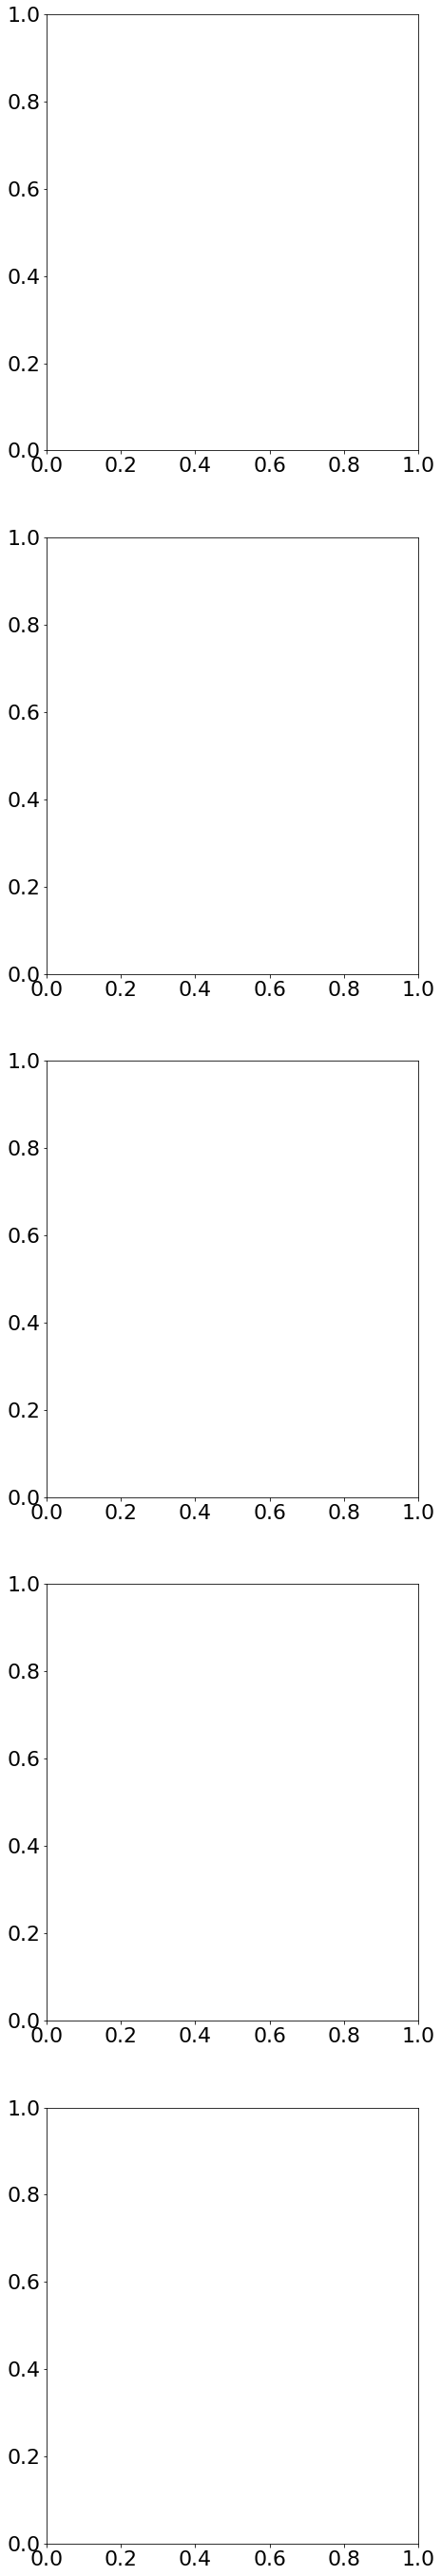

In [127]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
fig,ax = plt.subplots(5,1,figsize=(7,7*7))

mt = a['meantempclass'].unique()
try:
    codes = mt.codes
except:
    codes = mt#range(max(a['meantempclass']))
lo = np.zeros(len(codes))
var = dratave
r2max = np.zeros(len(codes))
superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
lox = np.zeros(len(codes))
abox.index = abox['class']
for i in range(len(codes)):
    plt.sca(ax[i])
    try:
        lox[i] = mt[i].left

    except:
        try:
            lox[i] = codes[i]#codes[i][0].left#lens[i]
        except:
            continue
    plt.plot(var,r2s[i], '.k')
    plt.ylim([.2, .65])
    lo[i] = var[np.argmax(r2s[i])]
    r2max[i] = np.max(r2s[i])
    plt.xlabel('D/k')
    #plt.xscale('log')
    try:
        #plt.title(str(abox.loc[codes[i],'classnm'].iloc[0]))
        plt.title('Precip = ' +str(mt[codes[i]]))

    except:
        continue
    #plt.xlabel('E' + 'diffusion'.translate(subscript) + '/' 'E' + 'total'.translate(subscript))
    plt.xlabel('Ediffusion/Etotal')
    plt.ylabel('r'+'2'.translate(superscript))
    #plt.xlabel(t.loc[codes[i],'region'])
fig,ax = plt.subplots(figsize=(7,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.scatter(lox[r2max>.1],lo[r2max>.1],c=mntemp[r2max>.1],s=50)
#plt.scatter(lo[r2max>.3],r2max[r2max>.3],c='k',s=50)

#plt.yscale('log')
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.ylabel('r' + '2'.translate(superscript))
#plt.ylim((0,4))
#plt.xscale('log')


In [22]:
plt.plot(a['maxr2'][a['meantempclass']==13],a['ebe_mmkyr'][a['meantempclass'] == 13]/1000,'.')
plt.xscale('log')
plt.yscale('log')

KeyError: 'maxr2'

<ipython-input-23-b1b1f11ebd84>:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a1.geometry = a1.centroid
/Users/gr_1/opt/miniconda3/envs/ee/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


19

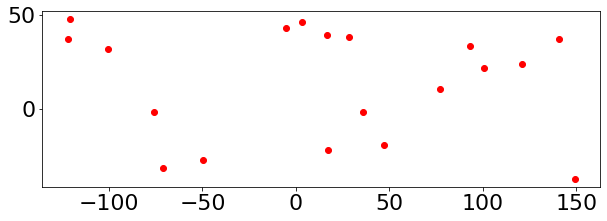

In [23]:
a1 = a[a['meantempclass'] == 1]
fig,ax = plt.subplots(figsize=(10,10))
#world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres')).plot(ax=ax,alpha=.5)
a1.geometry = a1.centroid
a1.plot(color='r',ax=ax)
len(a1)


In [379]:
slps1 = np.load('slpsall.npy')

<ipython-input-386-e4a303034d1d>:8: RuntimeWarning: divide by zero encountered in log
  x = np.log(slps1[:len(a)])


Text(0.00630957344480193, 0.005011872336272725, 'slope = 1.7 ')

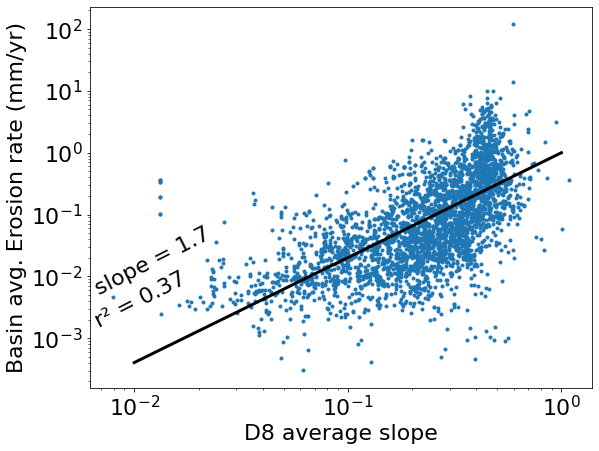

In [386]:
plt.subplots(figsize=(9,7))
plt.plot(slps1[:len(a)], a['ebe_mmkyr']/1000,'.')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('D8 average slope')
plt.ylabel('Basin avg. Erosion rate (mm/yr)')
y = np.log(np.float64(a['ebe_mmkyr'])/1000)
x = np.log(slps1[:len(a)])
#I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
#x=x[I_min]
#y=y[I_min]
I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
x=np.delete(x,I)
y=np.delete(y,I)
I2 = np.where(np.logical_or(np.isnan(y),np.isinf(y)))[0]
x=np.delete(x,I2)
y=np.delete(y,I2)



l1  = lm.LinearRegression(fit_intercept=False)
l1 = l1.fit(x.reshape(-1,1),y.reshape(-1,1))
x2 = np.log(np.linspace(10**-2,10**0,100).reshape(-1,1))
y2 = l1.predict(x2)
plt.plot(np.exp(x2),np.exp(y2),'k',linewidth=3)
y3 = l1.predict((x.reshape(-1,1)))
r2 = sklearn.metrics.r2_score(y.reshape(-1,1),y3.reshape(-1,1))
plt.text(10**-2.2,10**-2.82,'r' +'2'.translate(superscript) + ' = {} '.format(str(np.round(r2,2))),rotation=27)
plt.text(10**-2.2,10**-2.3,'slope'+ ' = {} '.format(str(np.round(l1.coef_[0][0],1))),rotation=27)


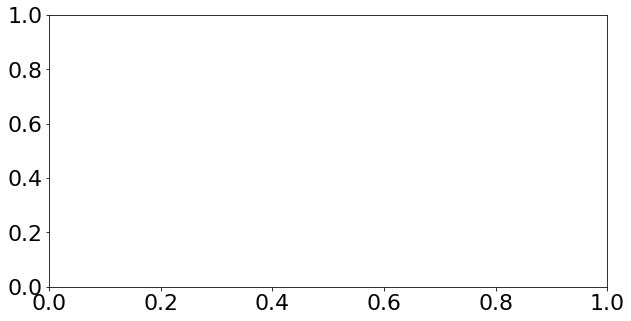

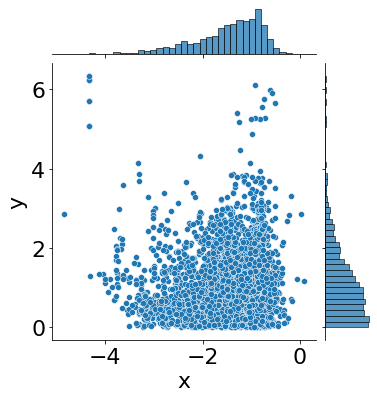

In [312]:
fig,ax=plt.subplots(figsize=(10,5))
t = pd.DataFrame()
t['x'] = x
t['y'] = np.abs(y.ravel() - y3.ravel())
sns.jointplot(data=t,x='x',y='y',ax=ax)

#plt.yscale('log')
#plt.xscale('log')

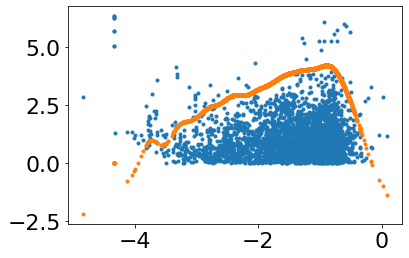

In [377]:
from numpy import array, linspace
from sklearn.neighbors import KernelDensity
from matplotlib.pyplot import plot
diff = np.abs(y3.reshape(-1,1)-y.reshape(-1,1))
lens = np.array(list(range(len(diff))))
kde = KernelDensity(kernel='gaussian', bandwidth=.1).fit(x.reshape([-1,1]),diff.reshape([-1,1]))
s = kde.score_samples(x.reshape(-1,1))
plt.plot(x,diff,'.')
plt.plot(x,s+4.5,'.')


In [1526]:
a['meantempclass'] = 0
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
a['meantempclass'][a.index[a.geometry.centroid.x<-90]] = 3# West coast
a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.x>100,a.geometry.centroid.y<0)]] = 4

<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  a['meantempclass'][a.index[np.logical_and(a.geometry.centroid.y>20,a.geometry.centroid.x<-50)]] = 2# East coast
<ipython-input-1526-54ac65292004>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  a['meantempclass'][a.index[np.logical_and(a.geometry.centr

In [ ]:
#a['binval'] = [a['meantempclass'][i].left for i in range(len(a))]

fig,ax = plt.subplots(figsize=(20,20))
b = a.copy()
b.geometry = b.geometry.centroid
b.plot(column='meantempclass',ax=ax,vmin=-1,vmax=20,cmap='jet', s = 1)

In [1023]:
l1 =[]
for i in range(len(dfs)):
    l1.append(len(dfs[i][dfs[i]>.00001]))
l1 = np.array(l1)

1.5705192050025845e-07

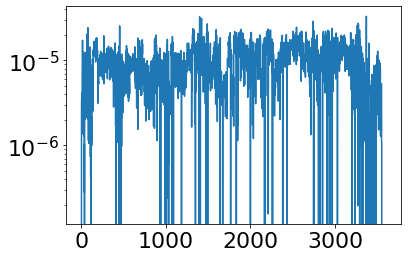

In [1001]:
plt.plot(dfs[100])
plt.yscale('log')
np.min(dfs[100][dfs[100]>0])

## I copied over parts of the diffusion notebook here

In [351]:
folder = 'results/r_mn0'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

0.01

In [353]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
              
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i]
            c+=1
    #return dfs
dfs_d = dfs.copy()

In [364]:
folder = 'results/r_mn05_6'
ns = np.load('{}/ns.npy'.format(folder),allow_pickle=True)
ms = np.load('{}/ms.npy'.format(folder),allow_pickle=True)
diffus = np.load('{}/diffu.npy'.format(folder),allow_pickle=True)
Gs = np.load('{}/Gs.npy'.format(folder),allow_pickle=True)
eros1 = np.load('{}/eros.npy'.format(folder),allow_pickle=True)
ks = np.load('{}/ks.npy'.format(folder),allow_pickle=True)
careas = np.load('{}/careas.npy'.format(folder),allow_pickle=True)

In [375]:
#@jit(nopython=True)
#def loop_results(eros1, dfs,n,c):
n = 3553
nt = 1000
dfs = np.array([None]*len(eros1[1]))
drat = np.array([None]*len(eros1[1]))
            
c=0
for i in range(len(eros1[1])):
        dfs[i] = np.zeros(len(eros1))
        drat[i] = np.zeros(len(eros1))

        for k in range(1,len(eros1)):
            if (eros1[k] is None):
                continue
            else:
                dfs[i][k] = eros1[k][i] #- dfs_d[0][k]* diffus[i]/.01
                #dfs[i][k] = dfs[i][k] + dfs_d[0][k]*200
                drat[i][k] = (dfs_d[0][k] * diffus[i] / .01 ) / eros1[k][i] 
            c+=1
    #return dfs


<ipython-input-375-fcba7972bd9b>:19: RuntimeWarning: invalid value encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] / 7 ) / eros1[k][i]
<ipython-input-375-fcba7972bd9b>:19: RuntimeWarning: divide by zero encountered in double_scalars
  drat[i][k] = (dfs_d[0][k] * diffus[i] / 7 ) / eros1[k][i]


In [373]:
diffus[0]

0.00021736573487814788

In [366]:
from sklearn import linear_model as lm
import sklearn
r2s = np.zeros(len(eros1[1]))
resid = np.zeros(len(eros1[1]))
pcoef = np.zeros(len(eros1[1]))
dratave = np.zeros(len(eros1[1]))

ks2 = ns.copy()#ks.copy()
diffus2 = diffus.copy()
badn = []
for i in range(len(eros1[1])):#range(len(ms)):
        if dfs[i] is None:
            continue
        
        y = np.log(np.float64(a['ebe_mmkyr'])/1000)
        x = np.log(dfs[i][:len(a)])
        #I_min = np.where(a['slp_ave'][:n]/1000>1e-1)[0]
        #x=x[I_min]
        #y=y[I_min]
        xi = x.copy()
        I = np.where(np.logical_or(np.isnan(x),np.isinf(x)))[0]
        x=np.delete(x,I)
        y=np.delete(y,I)
        I2 = np.where(np.logical_or(np.isnan(y),np.isnan(x)))[0]
        x = np.delete(x,I2)
        y = np.delete(y,I2)
        l1  = lm.LinearRegression(fit_intercept=False)
        l = lm.LinearRegression(fit_intercept=False)
        if len(x[np.logical_not(np.isnan(x))])>n-3000:
                #print(len(x[np.logical_not(np.isnan(x))]))
                
                p1 = l1.fit(np.exp(x.reshape(-1,1)),np.exp(y.reshape(-1,1)))
                p = l.fit(x.reshape(-1,1), y.reshape(-1,1 ))

                intercept =np.mean(y-x)
                y2 = x+intercept
                #y2 = p.predict(x.reshape(-1,1))
                y3 = np.exp(x) * p1.coef_#p1.predict(np.exp(x.reshape(-1,1)))
                try:
                    r2s[i] = sklearn.metrics.r2_score(y.reshape(-1,1),y2)

                except:
                    print('here')
                diffus2[i] *= p1.coef_
                ks2[i] *= p1.coef_
                resid[i] = -np.sum(np.power(y.ravel()-np.log(y3.ravel()),2))
                #print(len(y[np.logical_not(np.isnan(x))]))
                pcoef[i] = p1.intercept_
                dratave[i] = np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )])
               # if resid[i]>127.9:
                #    break
        else:
            print(i)
            badn.append(diffus[i])
            


<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by zero encountered in log
  x = np.log(dfs[i][:len(a)])
<ipython-input-366-7112be0e8324>:16: RuntimeWarning: divide by z

In [249]:
for i in range(1000):
    #print(np.mean(drat[i][np.logical_and(drat[i]>0, np.abs(drat[i]) < 1e10 )]))

IndentationError: expected an indented block (<ipython-input-249-6ec7fb48afa8>, line 2)

(0.3, 0.5)

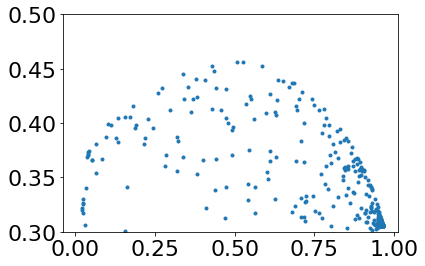

In [381]:
plt.plot(dratave/4,r2s,'.')
plt.ylim([.3,.5])

In [386]:
1/3.9

0.25641025641025644

In [526]:
#plt.plot((ns),r2s[3],'.')
#plt.ylim((0,.5))
plt.rcParams.update({'font.size': 22})
subscript = str.maketrans("0123456789", "₀₁₂₃₄₅₆₇₈₉")

superscript = str.maketrans("0123456789", "⁰¹²³⁴⁵⁶⁷⁸⁹")
mt = a['meantempclass'].unique()
codes = mt.codes
lo = np.zeros(len(codes))
var = dratave


lox = np.zeros(len(codes))
for i in range(len(codes)):
    lox[codes[i]] = mt[codes[i]].left
    fig,ax = plt.subplots(figsize=(10,7))
    plt.plot(var,r2s[codes[i]], '.k')
    plt.ylim([.2, .65])
    lo[codes[i]] = var[np.argmax(r2s[codes[i]])]
    plt.xlabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
    #plt.xscale('log')
    plt.title('Range = ' + str(mt[codes[i]]))

fig,ax = plt.subplots(figsize=(10,7))

# for i in range(len(a['meantempclass'].unique())):
#     fig,ax = plt.subplots(figsize=(7,7))
#     plt.hist(ns[r2s[l]>.3], kde=True)

plt.plot(lox,lo,'k.-',linewidth=2,markersize=30)
plt.ylabel('E'+'diffusive'.translate(subscript)+' / E'+'total'.translate(subscript))
plt.xlabel ('Mean Annual Precipitation (mm/yr)')
#plt.yscale('log')


KeyError: 'meantempclass'

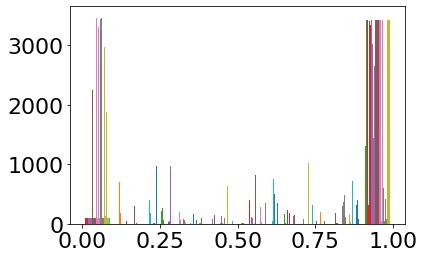

## Geologic 

In [643]:
from rasterstats import zonal_stats as zn
import rasterio as rio

In [648]:
geo = zn(a,'/users/gr_1/Documents/cosmo_predict/geo4.tif',stats=['majority','min','max','mean'])
major = [geo[i]['majority'] for i in range(len(geo))]
means = [geo[i]['mean'] for i in range(len(geo))]
mins = [geo[i]['min'] for i in range(len(geo))]


RasterioIOError: /users/gr_1/Documents/cosmo_predict/geo4.tif: No such file or directory

In [645]:
a['meantempclass'] = major
#a['meantempclass'] 

NameError: name 'major' is not defined

In [ ]:
sns.color_palette("tab10").as_hex()[0]

NameError: name 'major' is not defined

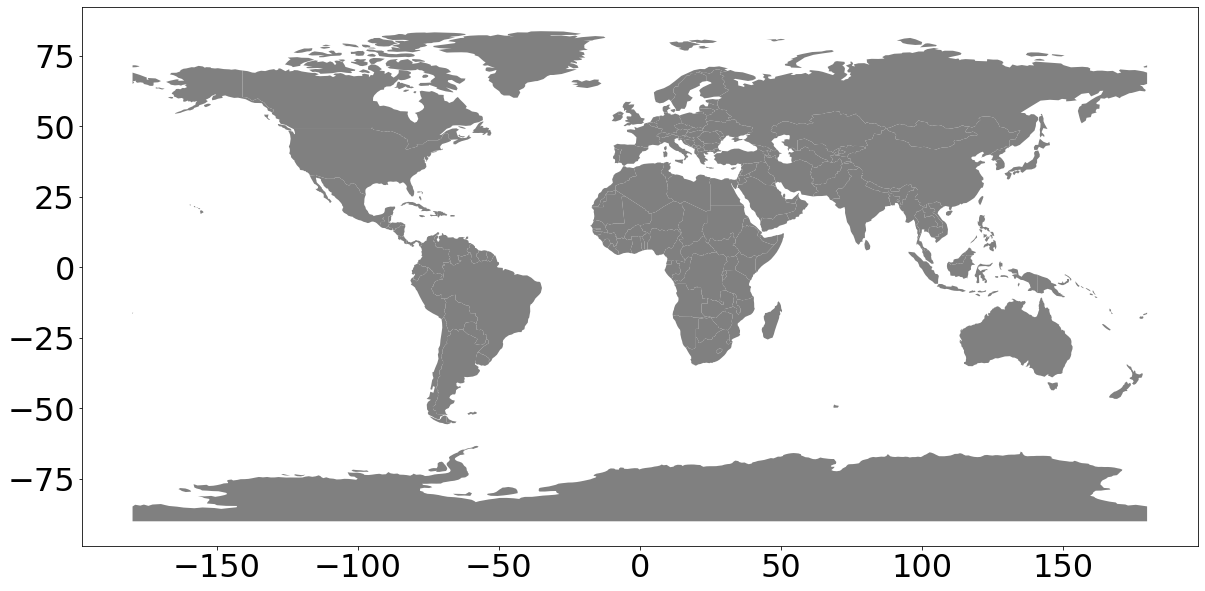

In [646]:
from matplotlib.colors import ListedColormap

fig,ax = plt.subplots(figsize=(20,10))
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
world.plot(ax=ax,color='grey')
a['geo'] = major

a['geo'][a['geo'] == 146] = 1
a['geo'][a['geo'] == 96] = 0 
a['geo'][a['geo'] == 167] = 2
a['geo'][a['geo'] == 252] = 3
a['geo'][a['geo'] == 255] = 4

a2 = a.copy()
a2.geometry = a.geometry.centroid


a2.plot('geo',ax = ax,cmap = ListedColormap(sns.color_palette("tab10").as_hex()[:5]),vmin=0, vmax=5,alpha=.5)
#plt.imshow(f)

In [1598]:
f = rio.open('geology.tif')
r = f.read()
r2 = r.copy()

In [1599]:


geovals = [146,167,252,255,96,253,176,187]



In [1600]:
ageo = gpd.GeoDataFrame(geometry=a['geometry'])

In [1688]:
ageo['geo'] = a['geo']

In [1689]:
ageo.to_file('geo_test')

In [ ]:
test['Short-term erosion rate (mm kyr^-1)']

In [699]:
test = pd.read_csv('/Users/gr_1/Downloads/Chen_et_al_2021_short-term_erosion_rate_data.csv')

In [705]:
test['log(short-term erosion rate (mm kyr-1))'] = np.log10(test['Short-term erosion rate (mm kyr^-1)'])

In [ ]:
test['log(short-term erosion rate (mm kyr-1))']

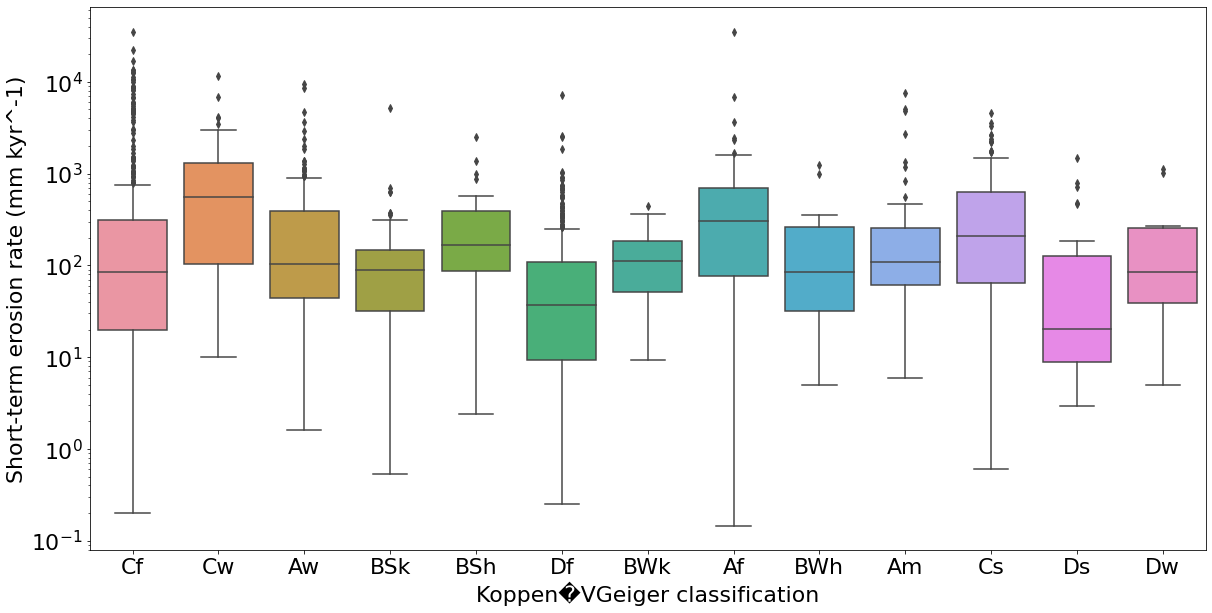

In [706]:
plt.subplots(figsize=(20,10))

sns.boxplot(data=test,x='Koppen�VGeiger classification',y='Short-term erosion rate (mm kyr^-1)')
plt.yscale('log')

AttributeError: module 'seaborn' has no attribute 'qqplot'

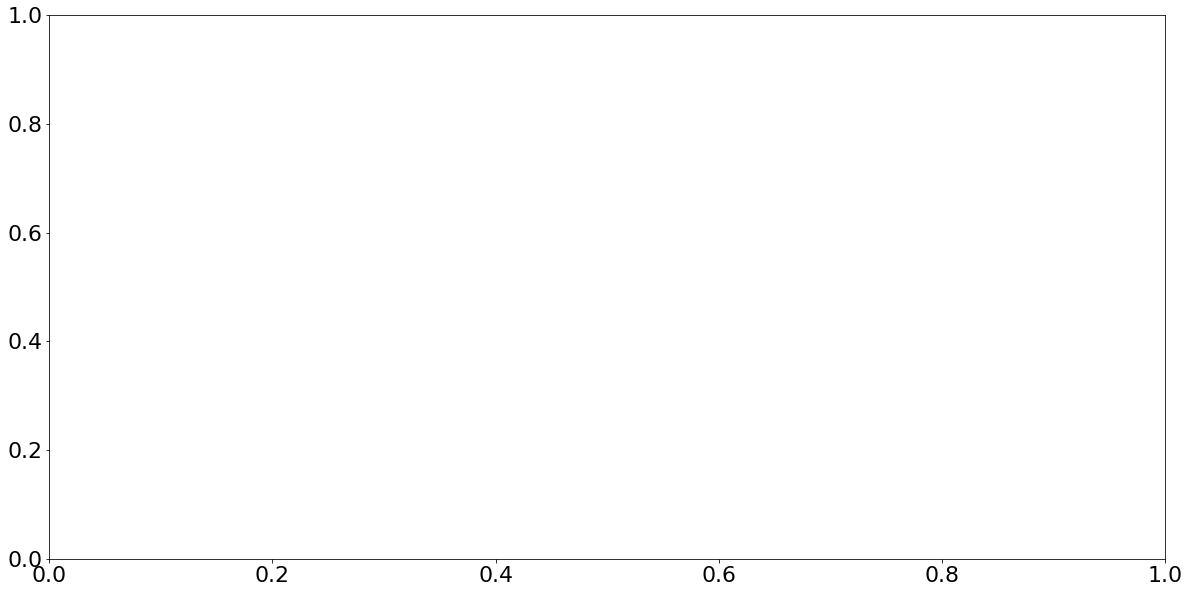

In [774]:
plt.subplots(figsize=(20,10))

sns.qq(data=test,x='Koppen�VGeiger classification',y='log(short-term erosion rate (mm kyr-1))')


In [783]:
from statsmodels.graphics.gofplots import qqplot_2samples

<AxesSubplot:xlabel='log(short-term erosion rate (mm kyr-1))', ylabel='Count'>

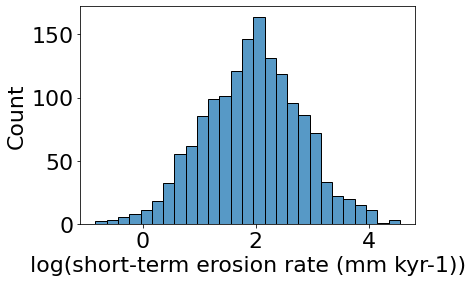

In [708]:
sns.histplot(data=test,x='log(short-term erosion rate (mm kyr-1))')

In [801]:
from scipy.stats import kruskal as ks

In [818]:
g1 = []
g2 = []
for i,g in test.groupby('Koppen�VGeiger classification'):
    g1.append(g['Short-term erosion rate (mm kyr^-1)'])
    g2.append(g['log(short-term erosion rate (mm kyr-1))'])

In [819]:
p = np.zeros((len(g1),len(g1)))
for i in range(len(g1)):
    for j in range(i,len(g1)):
        p[i,j] = ks(g1[j],g1[i]).pvalue

In [815]:
g1 = []
for i in range(10):
    subset = test.sample(10)
    g1.append(subset['Short-term erosion rate (mm kyr^-1)'])

([<matplotlib.axis.YTick at 0x1b5a0e580>,
 [Text(0, 0, 'Cf'),
  Text(0, 1, 'Cw'),
  Text(0, 2, 'Aw'),
  Text(0, 3, 'BSk'),
  Text(0, 4, 'BSh'),
  Text(0, 5, 'Df'),
  Text(0, 6, 'BWk'),
  Text(0, 7, 'Af'),
  Text(0, 8, 'BWh'),
  Text(0, 9, 'Am'),
  Text(0, 10, 'Cs'),
  Text(0, 11, 'Ds'),
  Text(0, 12, 'Dw')])

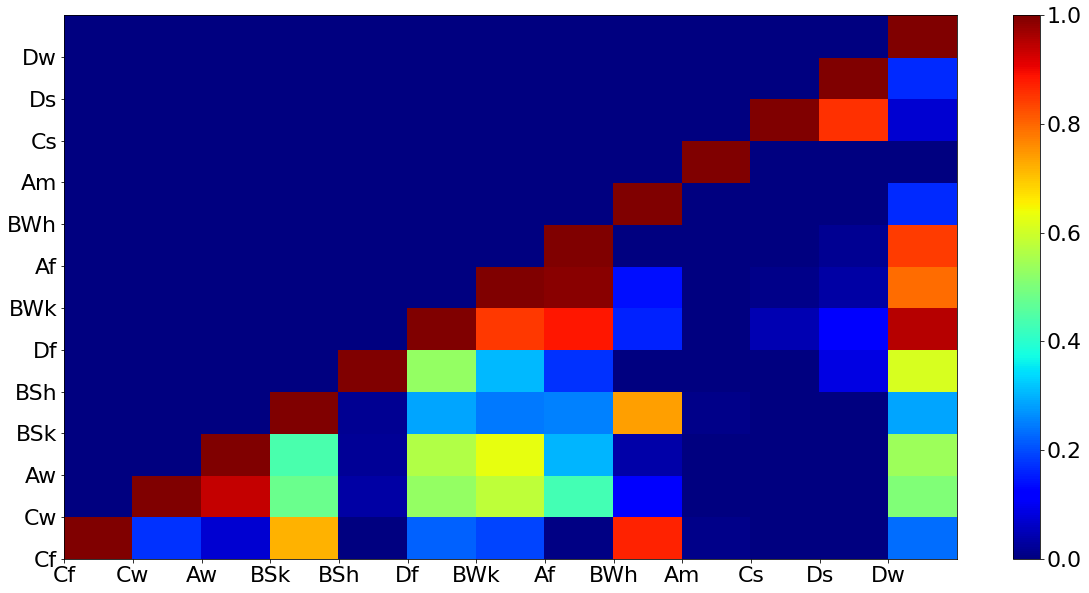

In [773]:
plt.subplots(figsize=(20,10))
plt.pcolor(p,vmin=0,vmax=1,cmap='jet')
plt.colorbar()
plt.xticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())
plt.yticks(ticks=list(range(len(g2))),labels=test['Koppen�VGeiger classification'].unique())